# Instalando Dependecias

In [1]:
pip install rdflib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install SPARQLWrapper

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pyvis

Note: you may need to restart the kernel to use updated packages.


# Importaciones

In [34]:
from rdflib import Graph
from SPARQLWrapper import SPARQLWrapper, JSON, N3
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
import pyvis
from pyvis.network import Network
import networkx as nx
import json

# Desarrollo

## 1. Filtrando los datos de la película (usando SPARQL)

In [7]:
sparql = SPARQLWrapper('https://dbpedia.org/sparql')
def detallePelicula(titulo):
    sparql.setQuery('''
        SELECT ?name ?director ?country ?starring ?abstract ?studio ?producer ?music
        WHERE { dbr:'''+titulo+''' dbp:name ?name .
                dbr:'''+titulo+''' dbo:director ?director .
                dbr:'''+titulo+''' dbp:country ?country .
                dbr:'''+titulo+''' dbp:starring ?starring .
                dbr:'''+titulo+''' dbo:abstract ?abstract .
                dbr:'''+titulo+''' dbp:studio ?studio .
                dbr:'''+titulo+''' dbp:producer ?producer .
                dbr:'''+titulo+''' dbp:music ?music .

                FILTER (lang(?abstract) = 'en')
        }''')
    sparql.setReturnFormat(JSON)
    qres = sparql.query().convert()
    
    diccionarios = []
    for res in qres["results"]["bindings"]:
        dic ={
            "name":res["name"]["value"],
            "director":res["director"]["value"].split("/")[-1],
            "country":res["country"]["value"],
            "abstract":res["abstract"]["value"],
            "starring":res["starring"]["value"].split("/")[-1],
            "studio":res["studio"]["value"].split("/")[-1],
            "producer":res["producer"]["value"].split("/")[-1],
            "music":res["music"]["value"].split("/")[-1],
        }
        diccionarios.append(dic)
    print(len(diccionarios))
    
    dics_string = json.dumps(diccionarios)  
    a_json = json.loads(dics_string)
    dataframe = pd.DataFrame.from_dict(a_json)
    dataframe.drop_duplicates()
    
    return dataframe

In [8]:
def nuevo(titulo):
    dataframe = detallePelicula(titulo)
    dataframe.reset_index()
    dataframe.drop_duplicates()
    return dataframe

def enriquecer(dataframe,titulo):
    df=dataframe.append(detallePelicula(titulo))
    df.reset_index()
    df.drop_duplicates()
    return df

In [9]:
detallePelicula("The_Lizzie_McGuire_Movie")

18


,name,director,country,abstract,starring,studio,producer,music
0,The Lizzie McGuire Movie,Jim_Fall,United States,The Lizzie McGuire Movie is a 2003 American te...,Hilary Duff,,Stan_Rogow,Cliff_Eidelman
1,The Lizzie McGuire Movie,Jim_Fall,United States,The Lizzie McGuire Movie is a 2003 American te...,,,Stan_Rogow,Cliff_Eidelman
2,The Lizzie McGuire Movie,Jim_Fall,United States,The Lizzie McGuire Movie is a 2003 American te...,Jake Thomas,,Stan_Rogow,Cliff_Eidelman
3,The Lizzie McGuire Movie,Jim_Fall,United States,The Lizzie McGuire Movie is a 2003 American te...,Adam Lamberg,,Stan_Rogow,Cliff_Eidelman
4,The Lizzie McGuire Movie,Jim_Fall,United States,The Lizzie McGuire Movie is a 2003 American te...,Hallie Todd,,Stan_Rogow,Cliff_Eidelman
5,The Lizzie McGuire Movie,Jim_Fall,United States,The Lizzie McGuire Movie is a 2003 American te...,Robert Carradine,,Stan_Rogow,Cliff_Eidelman
6,The Lizzie McGuire Movie,Jim_Fall,United States,The Lizzie McGuire Movie is a 2003 American te...,Hilary Duff,Walt Disney Pictures,Stan_Rogow,Cliff_Eidelman
7,The Lizzie McGuire Movie,Jim_Fall,United States,The Lizzie McGuire Movie is a 2003 American te...,,Walt Disney Pictures,Stan_Rogow,Cliff_Eidelman
8,The Lizzie McGuire Movie,Jim_Fall,United States,The Lizzie McGuire Movie is a 2003 American te...,Jake Thomas,Walt Disney Pictures,Stan_Rogow,Cliff_Eidelman
9,The Lizzie McGuire Movie,Jim_Fall,United States,The Lizzie McGuire Movie is a 2003 American te...,Adam Lamberg,Walt Disney Pictures,Stan_Rogow,Cliff_Eidelman


## 2. Filtrando los datos de los actores (usando SPARQL)

In [10]:
sparql = SPARQLWrapper('https://dbpedia.org/sparql')
def detalleActor(nombre):
    sparql.setQuery('''
        SELECT ?name ?birthDate ?birthPlace ?abstract
        WHERE { 
                dbr:'''+nombre+''' dbp:name ?name .
                dbr:'''+nombre+''' dbp:birthDate ?birthDate .
                dbr:'''+nombre+''' dbp:birthPlace ?birthPlace .
                dbr:'''+nombre+''' dbo:abstract ?abstract .

                FILTER (lang(?abstract) = 'en')
        }''')
    sparql.setReturnFormat(JSON)
    qres = sparql.query().convert()
    
    diccionarios = []
    for res in qres["results"]["bindings"]:
        dic ={
            "name":res["name"]["value"].split("/")[-1],
            "birthDate":res["birthDate"]["value"],
            "abstract":res["abstract"]["value"],
            "birthPlace":res["birthPlace"]["value"].split("/")[-1],
        }
        diccionarios.append(dic)
    print(len(diccionarios))
    
    dics_string = json.dumps(diccionarios)  
    a_json = json.loads(dics_string)
    dataframe = pd.DataFrame.from_dict(a_json)
    dataframe.drop_duplicates()
    
    return dataframe

In [11]:
def nuevoActor(nombre):
    dataframe = detalleActor(nombre)
    dataframe.reset_index()
    dataframe.drop_duplicates()
    return dataframe

def enriquecerActor(dataframe,nombre):
    df=dataframe.append(detalleActor(nombre))
    df.reset_index()
    df.drop_duplicates()
    return df

In [12]:
#detalleActor("Toy_Story_3")

## 3. Método de Enriquecimiento Semántico

### 3.1 Enriquecimiento Películas

In [13]:
dataframe = nuevo ("Cars_2")

21


In [14]:
dataframe = enriquecer(dataframe,"Toy_Story_3")

36


/tmp/ipykernel_8367/3882681488.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=dataframe.append(detallePelicula(titulo))


In [15]:
dataframe = enriquecer(dataframe,"The_Good_Dinosaur")

54


/tmp/ipykernel_8367/3882681488.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=dataframe.append(detallePelicula(titulo))


In [16]:
dataframe = enriquecer(dataframe,"The_Lizzie_McGuire_Movie")

18


/tmp/ipykernel_8367/3882681488.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=dataframe.append(detallePelicula(titulo))


In [17]:
dataframe.shape

(129, 8)

In [18]:
dataframe.head(50)

,name,director,country,abstract,starring,studio,producer,music
0,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,Eddie Izzard,,Denise Ream,Michael_Giacchino
1,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,,,Denise Ream,Michael_Giacchino
2,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,Emily Mortimer,,Denise Ream,Michael_Giacchino
3,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,Larry the Cable Guy,,Denise Ream,Michael_Giacchino
4,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,Michael Caine,,Denise Ream,Michael_Giacchino
5,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,Owen Wilson,,Denise Ream,Michael_Giacchino
6,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,John Turturro,,Denise Ream,Michael_Giacchino
7,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,Eddie Izzard,Walt Disney Pictures,Denise Ream,Michael_Giacchino
8,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,,Walt Disney Pictures,Denise Ream,Michael_Giacchino
9,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,Emily Mortimer,Walt Disney Pictures,Denise Ream,Michael_Giacchino


### 3.2 Realizando búsqueda actores de las películas

In [19]:
dataframe['new_starring'] = dataframe['starring'].str.replace(' ', '_')
dataframe.head(50)

,name,director,country,abstract,starring,studio,producer,music,new_starring
0,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,Eddie Izzard,,Denise Ream,Michael_Giacchino,Eddie_Izzard
1,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,,,Denise Ream,Michael_Giacchino,
2,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,Emily Mortimer,,Denise Ream,Michael_Giacchino,Emily_Mortimer
3,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,Larry the Cable Guy,,Denise Ream,Michael_Giacchino,Larry_the_Cable_Guy
4,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,Michael Caine,,Denise Ream,Michael_Giacchino,Michael_Caine
5,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,Owen Wilson,,Denise Ream,Michael_Giacchino,Owen_Wilson
6,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,John Turturro,,Denise Ream,Michael_Giacchino,John_Turturro
7,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,Eddie Izzard,Walt Disney Pictures,Denise Ream,Michael_Giacchino,Eddie_Izzard
8,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,,Walt Disney Pictures,Denise Ream,Michael_Giacchino,
9,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,Emily Mortimer,Walt Disney Pictures,Denise Ream,Michael_Giacchino,Emily_Mortimer


In [20]:
dataframe.iloc[:1 , :]['new_starring'][0]

'Eddie_Izzard'

In [21]:
nuevoActor("Eddie_Izzard")

2


,name,birthDate,abstract,birthPlace
0,Eddie Izzard,1962-02-07,Eddie Izzard (/ˈɪzɑːrd/; born 7 February 1962)...,Aden
1,Eddie Izzard,1962-02-07,Eddie Izzard (/ˈɪzɑːrd/; born 7 February 1962)...,Aden_Colony


In [22]:
df_persona = nuevoActor( dataframe.iloc[:1 , :]['new_starring'][0] )

2


In [23]:
df_persona

,name,birthDate,abstract,birthPlace
0,Eddie Izzard,1962-02-07,Eddie Izzard (/ˈɪzɑːrd/; born 7 February 1962)...,Aden
1,Eddie Izzard,1962-02-07,Eddie Izzard (/ˈɪzɑːrd/; born 7 February 1962)...,Aden_Colony


In [24]:
for actor in dataframe.iloc[1: , :]['new_starring'].unique():
    try:
        df_persona = enriquecerActor(df_persona, actor)
    except:  
        print(actor)

0


/tmp/ipykernel_8367/510372867.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=dataframe.append(detalleActor(nombre))


1


/tmp/ipykernel_8367/510372867.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=dataframe.append(detalleActor(nombre))


1


/tmp/ipykernel_8367/510372867.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=dataframe.append(detalleActor(nombre))


1


/tmp/ipykernel_8367/510372867.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=dataframe.append(detalleActor(nombre))


1


/tmp/ipykernel_8367/510372867.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=dataframe.append(detalleActor(nombre))


1


/tmp/ipykernel_8367/510372867.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=dataframe.append(detalleActor(nombre))


2


/tmp/ipykernel_8367/510372867.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=dataframe.append(detalleActor(nombre))


1


/tmp/ipykernel_8367/510372867.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=dataframe.append(detalleActor(nombre))


0


/tmp/ipykernel_8367/510372867.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=dataframe.append(detalleActor(nombre))


1


/tmp/ipykernel_8367/510372867.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=dataframe.append(detalleActor(nombre))


1


/tmp/ipykernel_8367/510372867.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=dataframe.append(detalleActor(nombre))


1


/tmp/ipykernel_8367/510372867.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=dataframe.append(detalleActor(nombre))


1


/tmp/ipykernel_8367/510372867.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=dataframe.append(detalleActor(nombre))


1


/tmp/ipykernel_8367/510372867.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=dataframe.append(detalleActor(nombre))


1


/tmp/ipykernel_8367/510372867.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=dataframe.append(detalleActor(nombre))


1


/tmp/ipykernel_8367/510372867.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=dataframe.append(detalleActor(nombre))


1


/tmp/ipykernel_8367/510372867.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=dataframe.append(detalleActor(nombre))


1


/tmp/ipykernel_8367/510372867.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=dataframe.append(detalleActor(nombre))


1


/tmp/ipykernel_8367/510372867.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=dataframe.append(detalleActor(nombre))


0


/tmp/ipykernel_8367/510372867.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=dataframe.append(detalleActor(nombre))


1


/tmp/ipykernel_8367/510372867.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=dataframe.append(detalleActor(nombre))


1


/tmp/ipykernel_8367/510372867.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=dataframe.append(detalleActor(nombre))


1


/tmp/ipykernel_8367/510372867.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=dataframe.append(detalleActor(nombre))


1


/tmp/ipykernel_8367/510372867.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=dataframe.append(detalleActor(nombre))


1


/tmp/ipykernel_8367/510372867.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=dataframe.append(detalleActor(nombre))


1


/tmp/ipykernel_8367/510372867.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=dataframe.append(detalleActor(nombre))


2


/tmp/ipykernel_8367/510372867.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=dataframe.append(detalleActor(nombre))


1


/tmp/ipykernel_8367/510372867.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=dataframe.append(detalleActor(nombre))


1


/tmp/ipykernel_8367/510372867.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=dataframe.append(detalleActor(nombre))


0


/tmp/ipykernel_8367/510372867.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=dataframe.append(detalleActor(nombre))


0


/tmp/ipykernel_8367/510372867.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=dataframe.append(detalleActor(nombre))


In [25]:
dataframe.iloc[1: , :]['new_starring'].unique()

array(['', 'Emily_Mortimer', 'Larry_the_Cable_Guy', 'Michael_Caine',
       'Owen_Wilson', 'John_Turturro', 'Eddie_Izzard', 'Tom_Hanks',
       'John_Morris', 'Ned_Beatty', 'Tim_Allen', 'Wallace_Shawn',
       'Joan_Cusack', 'Michael_Keaton', 'Jodi_Benson', 'Estelle_Harris',
       'Don_Rickles', 'John_Ratzenberger', 'Sam_Elliott', 'Jack_Bright',
       'Anna_Paquin', 'Frances_McDormand', 'Steve_Zahn', 'A._J._Buckley',
       'Jeffrey_Wright', 'Raymond_Ochoa', 'Hilary_Duff', 'Jake_Thomas',
       'Adam_Lamberg', 'Hallie_Todd', 'Robert_Carradine'], dtype=object)

In [26]:
df_persona.rename( columns={'name':'actorName'}, inplace=True )

In [27]:
df_persona.head(100)

,actorName,birthDate,abstract,birthPlace
0,Eddie Izzard,1962-02-07,Eddie Izzard (/ˈɪzɑːrd/; born 7 February 1962)...,Aden
1,Eddie Izzard,1962-02-07,Eddie Izzard (/ˈɪzɑːrd/; born 7 February 1962)...,Aden_Colony
0,Emily Mortimer,1971-10-06,Emily Kathleen Anne Mortimer (born 6 October 1...,"Hammersmith, London, England"
0,Larry the Cable Guy,1963-02-17,"Daniel Lawrence Whitney (born February 17, 196...","Pawnee City, Nebraska, U.S."
0,Michael Caine,1933-03-14,Sir Michael Caine CBE (born Maurice Joseph Mic...,"Rotherhithe, London, England"
0,Owen Wilson,1968-11-18,"Owen Wilson (born November 18, 1968) is an Ame...","Dallas, Texas, U.S."
0,John Turturro,1957-02-28,John Michael Turturro (/tərˈtʊəroʊ/; born Febr...,"Brooklyn, New York, U.S."
0,Eddie Izzard,1962-02-07,Eddie Izzard (/ˈɪzɑːrd/; born 7 February 1962)...,Aden
1,Eddie Izzard,1962-02-07,Eddie Izzard (/ˈɪzɑːrd/; born 7 February 1962)...,Aden_Colony
0,Tom Hanks,1956-07-09,"Thomas Jeffrey Hanks (born July 9, 1956) is an...","Concord, California, U.S."


### 3.3 Uniendo Tabla Película - Personajes

In [28]:
dataframe = pd.merge( dataframe, df_persona, how='left', left_on='starring', right_on='actorName'  )

In [29]:
dataframe.head(50)

,name,director,country,abstract_x,starring,studio,producer,music,new_starring,actorName,birthDate,abstract_y,birthPlace
0,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,Eddie Izzard,,Denise Ream,Michael_Giacchino,Eddie_Izzard,Eddie Izzard,1962-02-07,Eddie Izzard (/ˈɪzɑːrd/; born 7 February 1962)...,Aden
1,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,Eddie Izzard,,Denise Ream,Michael_Giacchino,Eddie_Izzard,Eddie Izzard,1962-02-07,Eddie Izzard (/ˈɪzɑːrd/; born 7 February 1962)...,Aden_Colony
2,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,Eddie Izzard,,Denise Ream,Michael_Giacchino,Eddie_Izzard,Eddie Izzard,1962-02-07,Eddie Izzard (/ˈɪzɑːrd/; born 7 February 1962)...,Aden
3,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,Eddie Izzard,,Denise Ream,Michael_Giacchino,Eddie_Izzard,Eddie Izzard,1962-02-07,Eddie Izzard (/ˈɪzɑːrd/; born 7 February 1962)...,Aden_Colony
4,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,,,Denise Ream,Michael_Giacchino,,NaN,NaN,NaN,NaN
5,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,Emily Mortimer,,Denise Ream,Michael_Giacchino,Emily_Mortimer,Emily Mortimer,1971-10-06,Emily Kathleen Anne Mortimer (born 6 October 1...,"Hammersmith, London, England"
6,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,Larry the Cable Guy,,Denise Ream,Michael_Giacchino,Larry_the_Cable_Guy,Larry the Cable Guy,1963-02-17,"Daniel Lawrence Whitney (born February 17, 196...","Pawnee City, Nebraska, U.S."
7,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,Michael Caine,,Denise Ream,Michael_Giacchino,Michael_Caine,Michael Caine,1933-03-14,Sir Michael Caine CBE (born Maurice Joseph Mic...,"Rotherhithe, London, England"
8,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,Owen Wilson,,Denise Ream,Michael_Giacchino,Owen_Wilson,Owen Wilson,1968-11-18,"Owen Wilson (born November 18, 1968) is an Ame...","Dallas, Texas, U.S."
9,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,John Turturro,,Denise Ream,Michael_Giacchino,John_Turturro,John Turturro,1957-02-28,John Michael Turturro (/tərˈtʊəroʊ/; born Febr...,"Brooklyn, New York, U.S."


In [30]:
dataframe.fillna(-1, inplace=True)

In [31]:
dataframe.head(200)

,name,director,country,abstract_x,starring,studio,producer,music,new_starring,actorName,birthDate,abstract_y,birthPlace
0,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,Eddie Izzard,,Denise Ream,Michael_Giacchino,Eddie_Izzard,Eddie Izzard,1962-02-07,Eddie Izzard (/ˈɪzɑːrd/; born 7 February 1962)...,Aden
1,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,Eddie Izzard,,Denise Ream,Michael_Giacchino,Eddie_Izzard,Eddie Izzard,1962-02-07,Eddie Izzard (/ˈɪzɑːrd/; born 7 February 1962)...,Aden_Colony
2,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,Eddie Izzard,,Denise Ream,Michael_Giacchino,Eddie_Izzard,Eddie Izzard,1962-02-07,Eddie Izzard (/ˈɪzɑːrd/; born 7 February 1962)...,Aden
3,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,Eddie Izzard,,Denise Ream,Michael_Giacchino,Eddie_Izzard,Eddie Izzard,1962-02-07,Eddie Izzard (/ˈɪzɑːrd/; born 7 February 1962)...,Aden_Colony
4,Cars 2,John_Lasseter,United States,Cars 2 is a 2011 American computer-animated sp...,,,Denise Ream,Michael_Giacchino,,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,The Lizzie McGuire Movie,Jim_Fall,United States,The Lizzie McGuire Movie is a 2003 American te...,,Stan Rogow Productions,Stan_Rogow,Cliff_Eidelman,,-1,-1,-1,-1
137,The Lizzie McGuire Movie,Jim_Fall,United States,The Lizzie McGuire Movie is a 2003 American te...,Jake Thomas,Stan Rogow Productions,Stan_Rogow,Cliff_Eidelman,Jake_Thomas,Jake Thomas,1990-01-30,"Jake Thomas (born January 30, 1990) is an Amer...","Knoxville, Tennessee, U.S"
138,The Lizzie McGuire Movie,Jim_Fall,United States,The Lizzie McGuire Movie is a 2003 American te...,Adam Lamberg,Stan Rogow Productions,Stan_Rogow,Cliff_Eidelman,Adam_Lamberg,Adam Lamberg,1984-09-14,"Adam Matthew Lamberg (born September 14, 1984)...","New York City, New York, U.S."
139,The Lizzie McGuire Movie,Jim_Fall,United States,The Lizzie McGuire Movie is a 2003 American te...,Hallie Todd,Stan Rogow Productions,Stan_Rogow,Cliff_Eidelman,Hallie_Todd,-1,-1,-1,-1


## Relación Actor - Película - País de Origen - Estudio - Productor - Productor Musical

In [71]:
def grafo(df):
    G = nx.Graph()

    for a in df.itertuples():
        if a.starring != "":
            G.add_node(a.starring, size="20",labelHighlightBold=True)
            G.add_edge(a.starring, a.name)
            G.add_edge(a.name, a.country)
            G.add_edge(a.name, a.studio)
            G.add_edge(a.name, a.producer)
            G.add_edge(a.name, a.music)
            G.add_edge(a.starring, a.birthDate)

    
    net = Network(notebook=True,directed=True)

    net.from_nx(G)
    #net.show_buttons()
    net.repulsion(node_distance=100, spring_length=100,central_gravity=0.5)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, node_size=50, font_size=5, with_labels=True)
    plt.savefig('plotgraph.png', dpi=1000)
    plt.show()
    return net.show("example.html")

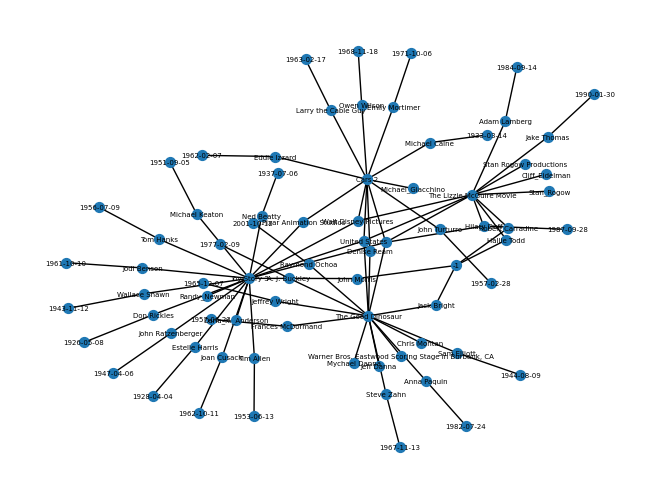

In [72]:
dataframe.head(100)
grafo(dataframe)